In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [15]:
# Definindo a média e o tamanho do DataFrame
media = 100
tamanho = 1000000

# Gerando os dados em torno da média
dados = np.random.poisson(media, tamanho)

# Criando o DataFrame
df = pd.DataFrame(dados, columns=['Valores'])

#Gravando a média

mu = df["Valores"].mean()

# Verificando a média dos valores gerados
print(f'Média dos valores gerados: {df["Valores"].mean():.0f}')

Média dos valores gerados: 100


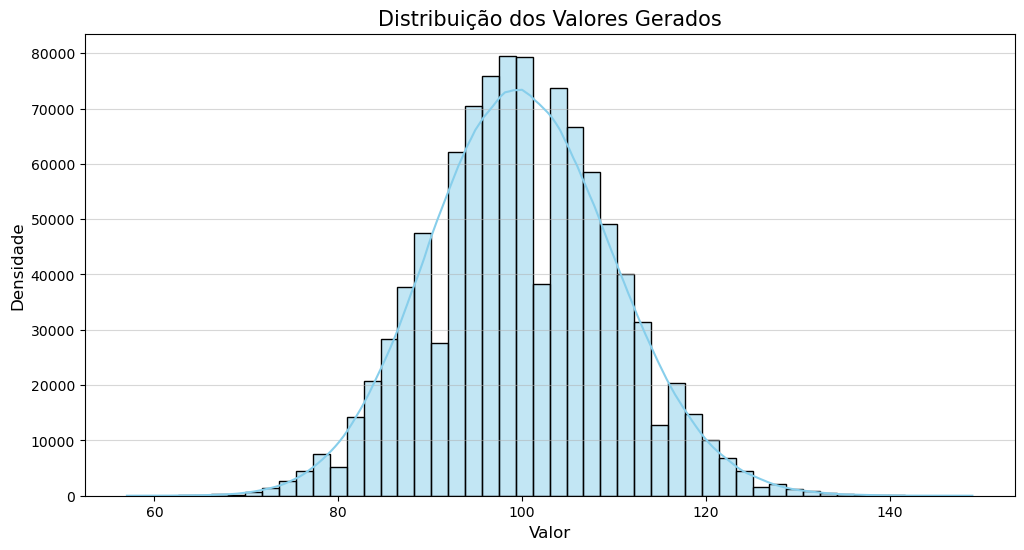

In [16]:
# Plotando os valores gerados
plt.figure(figsize=(12, 6))
sns.histplot(df['Valores'], color='skyblue', bins=50, kde=True)
plt.title('Distribuição dos Valores Gerados', fontsize=15)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [18]:
# Probabilidade de receber exatamente 100 chamadas em uma hora
p_100_calls = stats.poisson.pmf(k=100, mu=mu)
print(f"Probabilidade de receber exatamente 100 chamadas em uma hora: {p_100_calls:.2%}")

Probabilidade de receber exatamente 100 chamadas em uma hora: 3.9861%


In [19]:
#Probabilidades Específicas

# Probabilidade de receber menos de 90 chamadas em uma hora
p_less_than_90_calls = stats.poisson.cdf(k=89, mu=mu)
print(f"Probabilidade de receber menos de 90 chamadas em uma hora: {p_less_than_90_calls:.2%}")

# Probabilidade de receber mais de 120 chamadas em uma hora
p_more_than_120_calls = 1 - stats.poisson.cdf(k=120, mu=mu)
print(f"Probabilidade de receber mais de 120 chamadas em uma hora: {p_more_than_120_calls:.2%}")

Probabilidade de receber menos de 90 chamadas em uma hora: 14.62%
Probabilidade de receber mais de 120 chamadas em uma hora: 2.27%


In [23]:
# Probabilidade condicional de receber mais de 120 chamadas, dado que já recebemos mais de 100 chamadas
p_more_than_120_calls_given_more_than_100 = 1 - stats.poisson.cdf(k=120, mu=mu)
p_more_than_100_calls = 1 - stats.poisson.cdf(k=100, mu=mu)
p_conditional = p_more_than_120_calls_given_more_than_100 / p_more_than_100_calls
print(f"Probabilidade condicional de receber mais de 120 chamadas, dado que já recebemos mais de 100 chamadas: {p_conditional:.2%}")

Probabilidade condicional de receber mais de 120 chamadas, dado que já recebemos mais de 100 chamadas: 4.79%


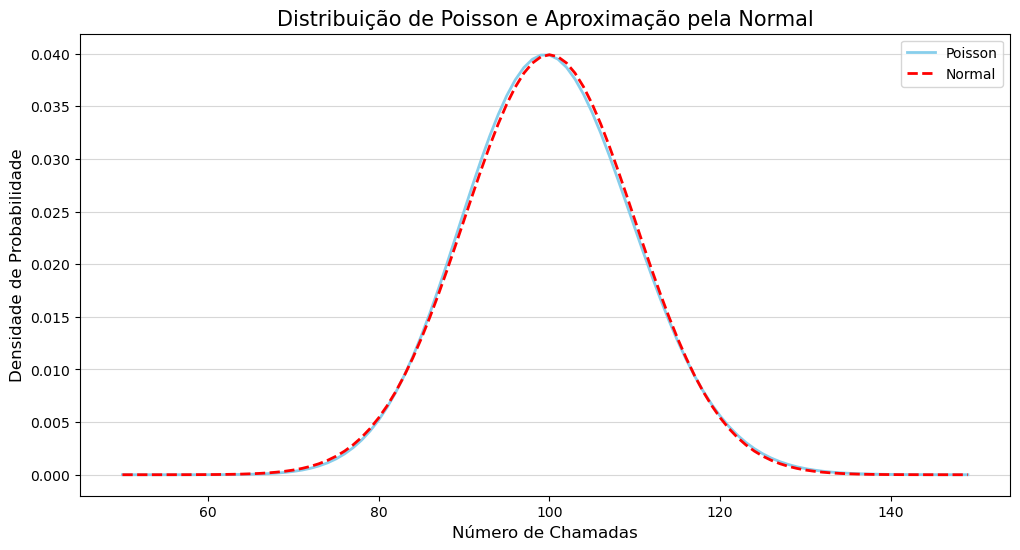

In [26]:
# Calculando a distribuição normal correspondente à distribuição de Poisson
x = np.arange(50, 150)
y = stats.norm.pdf(x, loc=mean, scale=np.sqrt(var))

# Plotando a distribuição de Poisson e a distribuição normal
plt.figure(figsize=(12, 6))
plt.plot(x, stats.poisson.pmf(x, mu=mu), label='Poisson', color='skyblue', linewidth=2)
plt.plot(x, y, label='Normal', color='red', linestyle='dashed', linewidth=2)
plt.title('Distribuição de Poisson e Aproximação pela Normal', fontsize=15)
plt.xlabel('Número de Chamadas', fontsize=12)
plt.ylabel('Densidade de Probabilidade', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

In [28]:
# Calculando os valores teóricos das distribuições
poisson_values = stats.poisson.pmf(x, mu=mu)
normal_values = stats.norm.pdf(x, loc=mean, scale=np.sqrt(var))

# Calculando a correlação de Pearson
correlation = np.corrcoef(poisson_values, normal_values)[0, 1]
print(f"Correlação de Pearson entre as distribuições de Poisson e Normal: {correlation:.2f}")


Correlação de Pearson entre as distribuições de Poisson e Normal: 1.00
